# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [148]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dropout

In [17]:
# your code here
df = pd.read_csv('tic-tac-toe.csv')

In [9]:
# Visualize the data set
df.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [11]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TL      958 non-null    object
 1   TM      958 non-null    object
 2   TR      958 non-null    object
 3   ML      958 non-null    object
 4   MM      958 non-null    object
 5   MR      958 non-null    object
 6   BL      958 non-null    object
 7   BM      958 non-null    object
 8   BR      958 non-null    object
 9   class   958 non-null    bool  
dtypes: bool(1), object(9)
memory usage: 68.4+ KB


In [13]:
# Replace categorical values with numeric values
df_numeric = df.replace({
    "x": 1,
    "o": 0,
    "b": -1,
    True: 1,
    False: 0
})

print(df_numeric)

     TL  TM  TR  ML  MM  MR  BL  BM  BR  class
0     1   1   1   1   0   0   1   0   0      1
1     1   1   1   1   0   0   0   1   0      1
2     1   1   1   1   0   0   0   0   1      1
3     1   1   1   1   0   0   0  -1  -1      1
4     1   1   1   1   0   0  -1   0  -1      1
..   ..  ..  ..  ..  ..  ..  ..  ..  ..    ...
953   0   1   1   1   0   0   0   1   1      0
954   0   1   0   1   1   0   1   0   1      0
955   0   1   0   1   0   1   1   0   1      0
956   0   1   0   0   1   1   1   0   1      0
957   0   0   1   1   1   0   0   1   1      0

[958 rows x 10 columns]


C:\Users\dylan\AppData\Local\Temp\ipykernel_14244\3445621832.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_numeric = df.replace({


In [15]:
# Input
X = df_numeric.drop(columns=["class"])  # Features

# Output
y = df_numeric["class"]

In [23]:
# StandardScaler
standard_scaler = StandardScaler()
X_standard = pd.DataFrame(standard_scaler.fit_transform(X), columns=X.columns)
print("\nInput Data Normalized (StandardScaler):")
print(X_standard)


Input Data Normalized (StandardScaler):
           TL        TM        TR        ML        MM        MR        BL  \
0    1.003223  1.084953  1.003223  1.084953 -0.420077 -0.167318  1.003223   
1    1.003223  1.084953  1.003223  1.084953 -0.420077 -0.167318 -0.286827   
2    1.003223  1.084953  1.003223  1.084953 -0.420077 -0.167318 -0.286827   
3    1.003223  1.084953  1.003223  1.084953 -0.420077 -0.167318 -0.286827   
4    1.003223  1.084953  1.003223  1.084953 -0.420077 -0.167318 -1.576877   
..        ...       ...       ...       ...       ...       ...       ...   
953 -0.286827  1.084953  1.003223  1.084953 -0.420077 -0.167318 -0.286827   
954 -0.286827  1.084953 -0.286827  1.084953  0.930371 -0.167318  1.003223   
955 -0.286827  1.084953 -0.286827  1.084953 -0.420077  1.084953  1.003223   
956 -0.286827  1.084953 -0.286827 -0.167318  0.930371  1.084953  1.003223   
957 -0.286827 -0.167318  1.003223  1.084953  0.930371 -0.167318 -0.286827   

           BM        BR  
0   -0.1

## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [212]:
# your code here
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.2, random_state=42)

# Print the shape of training and test data
print("Training Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Test Labels Shape:", y_test.shape)

Training Features Shape: (766, 9)
Test Features Shape: (192, 9)
Training Labels Shape: (766,)
Test Labels Shape: (192,)


In [240]:
# Create a Sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    tf.keras.layers.Dense(32, activation='relu'),                                  # Second hidden layer
    tf.keras.layers.Dense(16, activation='relu'),                                  # Third hidden layer
    tf.keras.layers.Dense(2, activation='softmax')                                 # Output layer with Softmax
])

# Compile the model
optimizer = Adam(learning_rate=0.01) # Adjust learning rate
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to see its architecture
model.summary()

C:\Users\dylan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_80 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,282 (12.82 KB)

 Trainable params: 3,282 (12.82 KB)

 Non-trainable params: 0 (0.00 B)

In [242]:
# Fit the train data
history = model.fit(
    X_train,  # Training data (features)
    y_train,  # Training labels (target)
    epochs=10,  # Number of epochs to train the model
    batch_size=32,  # Number of samples per batch
    validation_data=(X_test, y_test)  # Validation data to monitor performance
)

# Optionally, print the final evaluation on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6433 - loss: 0.6376 - val_accuracy: 0.7396 - val_loss: 0.5718
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7626 - loss: 0.5178 - val_accuracy: 0.8021 - val_loss: 0.4327
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8364 - loss: 0.3888 - val_accuracy: 0.8333 - val_loss: 0.3943
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8771 - loss: 0.3126 - val_accuracy: 0.8646 - val_loss: 0.3485
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9079 - loss: 0.2269 - val_accuracy: 0.8802 - val_loss: 0.2782
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9497 - loss: 0.1534 - val_accuracy: 0.9062 - val_loss: 0.2238
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9430 - loss: 0.1555 - val_accuracy: 0.8958 - val_loss: 0.2766
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9764 - loss: 0.0911 - val_accuracy: 0.9375 - val_loss

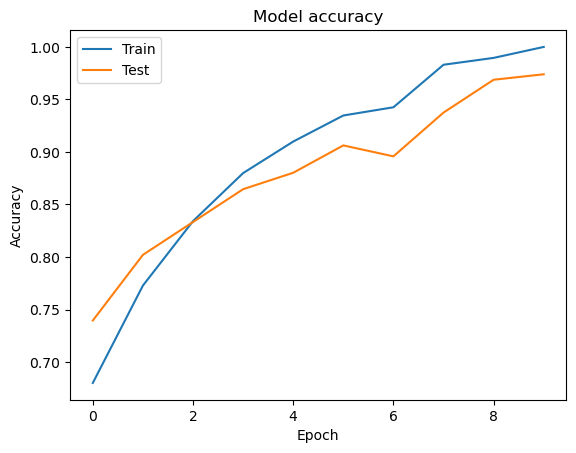

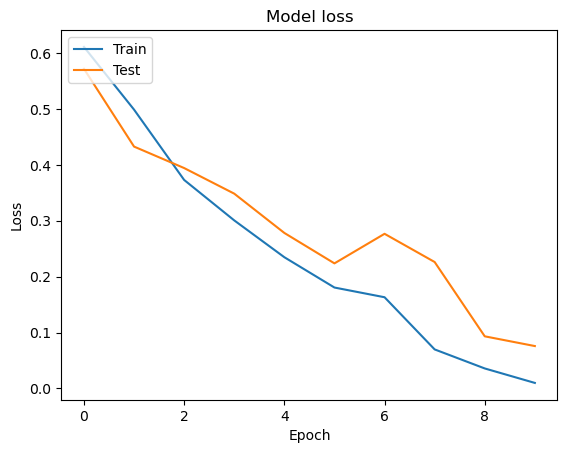

In [244]:
#Vizualization
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [246]:
# Save the model
model.save('tic-tac-toe.keras')

## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [248]:
# your code here
# Load the saved model
model = load_model('tic-tac-toe.keras')

# Select a few random rows from the test data
random_rows = X_test.sample(n=5, random_state=42)

# Get corresponding true labels for these rows
true_labels = y_test[random_rows.index]

# Normalize the selected rows using the same scaler that was used during training
random_rows_normalized = standard_scaler.transform(random_rows)

# Make predictions
predictions = model.predict(random_rows_normalized)

# Convert predictions to class labels (for binary classification, we need to threshold predictions)
predicted_labels = (predictions > 0.5).astype(int)

# Print random test samples, true labels, and predictions
print("\nRandom Test Samples and True Labels:")
print(random_rows)
print(true_labels)
print("\nPredictions on Random Test Samples:")
print(predicted_labels)

# Compare predictions with the true labels
print("\nTrue Labels vs Predicted Labels:")
for true, predicted in zip(true_labels, predicted_labels):
    print(f"True: {true}, Predicted: {predicted[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step

Random Test Samples and True Labels:
           TL        TM        TR        ML        MM        MR        BL  \
943  1.003223  1.084953 -0.286827 -0.167318 -0.420077  1.084953  1.003223   
110  1.003223  1.084953 -1.576877 -0.167318  0.930371 -1.419590 -0.286827   
88   1.003223  1.084953 -0.286827 -0.167318  0.930371 -0.167318  1.003223   
365 -0.286827 -0.167318  1.003223  1.084953  0.930371  1.084953  1.003223   
718  1.003223 -1.419590 -0.286827  1.084953  0.930371 -0.167318 -1.576877   

           BM        BR  
943  1.084953 -0.286827  
110 -0.167318  1.003223  
88  -0.167318  1.003223  
365 -0.167318 -0.286827  
718 -1.419590 -0.286827  
943    0
110    1
88     1
365    1
718    0
Name: class, dtype: int64

Predictions on Random Test Samples:
[[1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]]

True Labels vs Predicted Labels:
True: 0, Predicted: 1
True: 1, Predicted: 0
True: 1, Predicted: 0
True: 1, Predicted: 0
True: 0, Predicted: 1


In [250]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9771 - loss: 0.0739  
Test Loss: 0.0758243128657341
Test Accuracy: 0.9739583134651184


## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [ ]:
# your code here

**Which approach(es) did you find helpful to improve your model performance?**

### your answer here

At first I raised the number of layers and epoch but that quickly backfired and ended in giant losses. Then I decided to do the opposite way
and lower the amount of layers and epoch and that immedietly improved the performance of the model.
